In [34]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 


In [115]:
churn_df = pd.read_csv('\\user\\carpeta\\MaxQuantTXToutputFileGelSol3CellsLFQ\\proteinGroups.csv')
col_names = churn_df.columns.tolist()

print ("Column names:")
print (col_names)

to_show = col_names[46:49]
to_show2 = col_names[39:40]
to_show3 = col_names[40:41]
to_show4 = col_names[41:42]

print ("\nSample data:")
print(to_show2, to_show3, to_show4)
churn_df[to_show].head()

Column names:
['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)', 'Peptide counts (razor+unique)', 'Peptide counts (unique)', 'Protein names', 'Gene names', 'Fasta headers', 'Number of proteins', 'Peptides', 'Razor + unique peptides', 'Unique peptides', 'Peptides CaLo', 'Peptides HaCaT', 'Peptides SiHa', 'Razor + unique peptides CaLo', 'Razor + unique peptides HaCaT', 'Razor + unique peptides SiHa', 'Unique peptides CaLo', 'Unique peptides HaCaT', 'Unique peptides SiHa', 'Sequence coverage [%]', 'Unique + razor sequence coverage [%]', 'Unique sequence coverage [%]', 'Mol. weight [kDa]', 'Sequence length', 'Sequence lengths', 'Fraction average', 'Fraction 1', 'Fraction 2', 'Q-value', 'Score', 'Identification type CaLo', 'Identification type HaCaT', 'Identification type SiHa', 'Sequence coverage CaLo [%]', 'Sequence coverage HaCaT [%]', 'Sequence coverage SiHa [%]', 'Intensity', 'Intensity CaLo', 'Intensity HaCaT', 'Intensity SiHa', 'iBAQ', 'iBAQ CaLo', 'iBAQ HaCaT', 'iBAQ Si

,LFQ intensity CaLo,LFQ intensity HaCaT,LFQ intensity SiHa
0,4.937600e+08,6.110800e+08,1.089100e+09
1,1.507900e+09,1.696000e+09,1.799400e+09
2,0.000000e+00,0.000000e+00,1.675400e+09
3,1.305900e+10,1.743900e+10,1.457900e+10
4,0.000000e+00,4.014800e+07,0.000000e+00


Dimension de X (6604, 3)




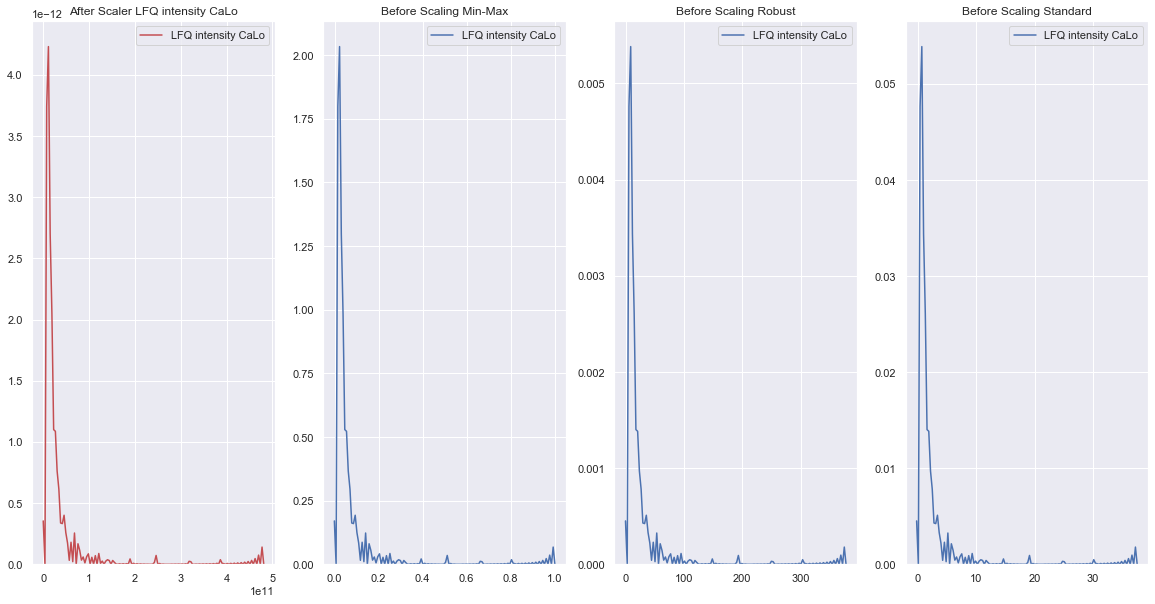

In [116]:
def main():

    datos = pd.read_csv('\\user\\carpeta\\MaxQuantTXToutputFileGelSol3CellsLFQ\\proteinGroups.csv', sep=',', skiprows=0, header=None).values
    X = datos[1:,46:49]
    
    #Intensity_CaLo = datos[1:,39:40]
    
    CaLo = datos[1:,46:47]
    HaCaT = datos[1:,47:48]
    SiHa = datos[1:,48:49]
    
    #print(X)
    print('Dimension de X',X.shape)
    print('\n')
    scaler = MinMaxScaler()
    scaler2 = RobustScaler()
    scaler3 = StandardScaler()
    
    #before = pd.DataFrame(X, columns=['LFQ intensity CaLo', 'LFQ intensity HaCaT', 'LFQ intensity SiHa'])
    
    before_calo = pd.DataFrame(CaLo, columns=['LFQ intensity CaLo'])
    before_hacat = pd.DataFrame(HaCaT, columns=['LFQ intensity HaCaT'])
    before_siha = pd.DataFrame(SiHa, columns=['LFQ intensity SiHa'])
    
    
    #print(before_calo)
    min_max_calo = scaler.fit_transform(CaLo)
    min_max_scaled_df = pd.DataFrame(min_max_calo, columns=['LFQ intensity CaLo']) 
    
    robust_calo = scaler2.fit_transform(CaLo)
    robust_scaled_df = pd.DataFrame(robust_calo, columns=['LFQ intensity CaLo'])     
    
    standard_calo = scaler3.fit_transform(CaLo)
    standard_scaled_df = pd.DataFrame(standard_calo, columns=['LFQ intensity CaLo'])  
    
    fig, (ax4,ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 10))
    
    ax4.set_title('After Scaler LFQ intensity CaLo')
    sns.kdeplot(before_calo['LFQ intensity CaLo'], ax=ax4,color="r")
    
    ax1.set_title('Before Scaling Min-Max')
    sns.kdeplot(min_max_scaled_df['LFQ intensity CaLo'], ax=ax1)
    
    ax2.set_title('Before Scaling Robust')
    sns.kdeplot(robust_scaled_df['LFQ intensity CaLo'], ax=ax2)
    
    ax3.set_title('Before Scaling Standard')
    sns.kdeplot(standard_scaled_df['LFQ intensity CaLo'], ax=ax3)
    
    plt.show()
    
if __name__ == "__main__":
    main()

Dimension de X (6604, 3)




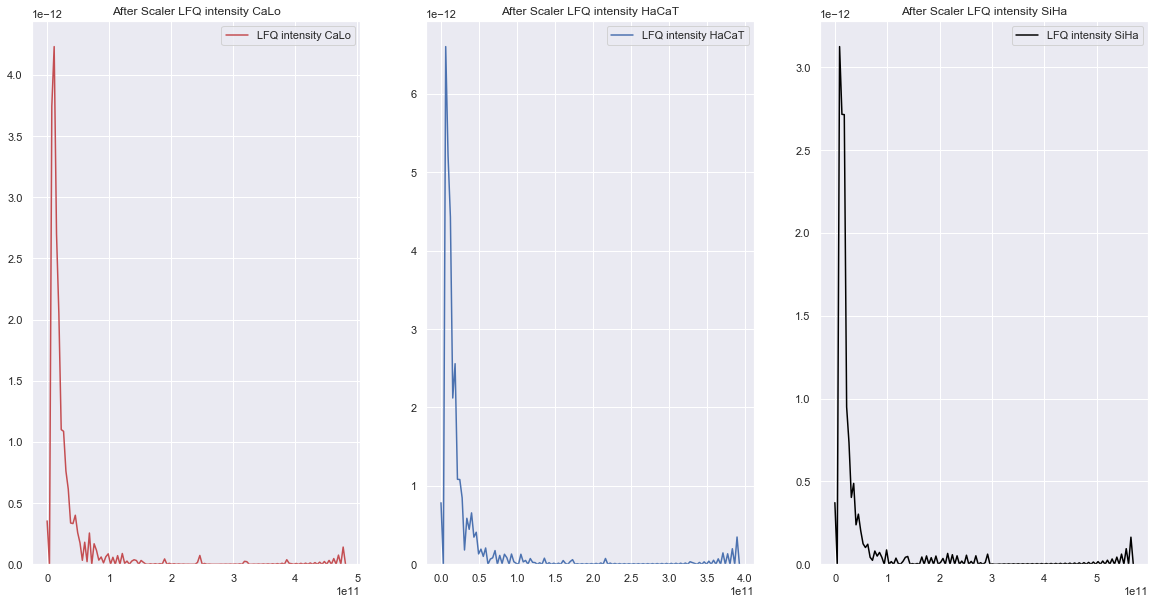

In [91]:
def main():

    datos = pd.read_csv('\\user\\carpeta\\MaxQuantTXToutputFileGelSol3CellsLFQ\\proteinGroups.csv', sep=',', skiprows=0, header=None).values

    X = datos[1:,46:49]
    #Intensity_CaLo = datos[1:,39:40]
    
    CaLo = datos[1:,46:47]
    HaCaT = datos[1:,47:48]
    SiHa = datos[1:,48:49]
    
    before_calo = pd.DataFrame(CaLo, columns=['LFQ intensity CaLo'])
    before_hacat = pd.DataFrame(HaCaT, columns=['LFQ intensity HaCaT'])
    before_siha = pd.DataFrame(SiHa, columns=['LFQ intensity SiHa'])

    #print(X)
    print('Dimension de X',X.shape)
    print('\n')

    fig2, (ax4, ax5, ax6) = plt.subplots(ncols=3, figsize=(20, 10))
    
    ax4.set_title('After Scaler LFQ intensity CaLo')
    sns.kdeplot(before_calo['LFQ intensity CaLo'], ax=ax4,color="r")  
    
    ax5.set_title('After Scaler LFQ intensity HaCaT')
    sns.kdeplot(before_hacat['LFQ intensity HaCaT'], ax=ax5,color="b")
    
    ax6.set_title('After Scaler LFQ intensity SiHa')
    sns.kdeplot(before_siha['LFQ intensity SiHa'], ax=ax6,color="black")    
    

    
    
    plt.show()
    
if __name__ == "__main__":
    main()

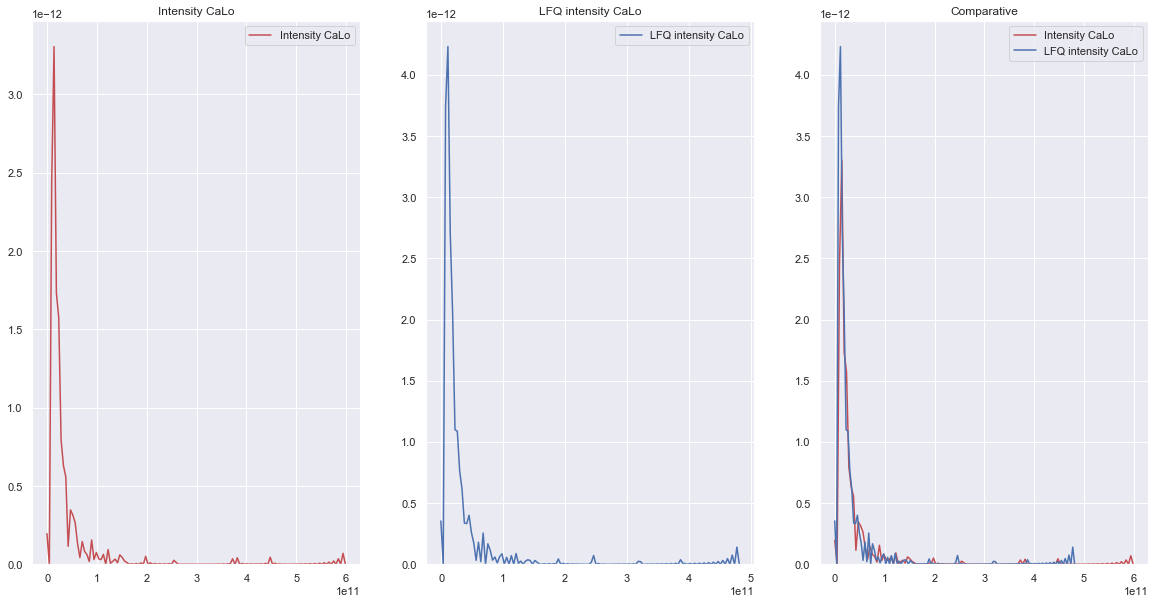

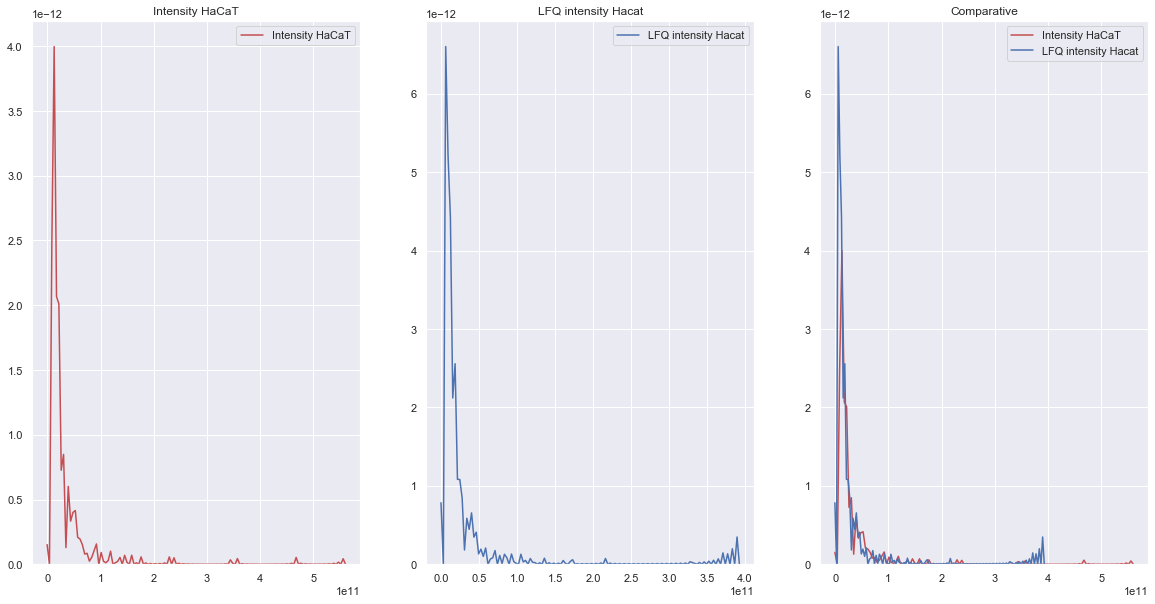

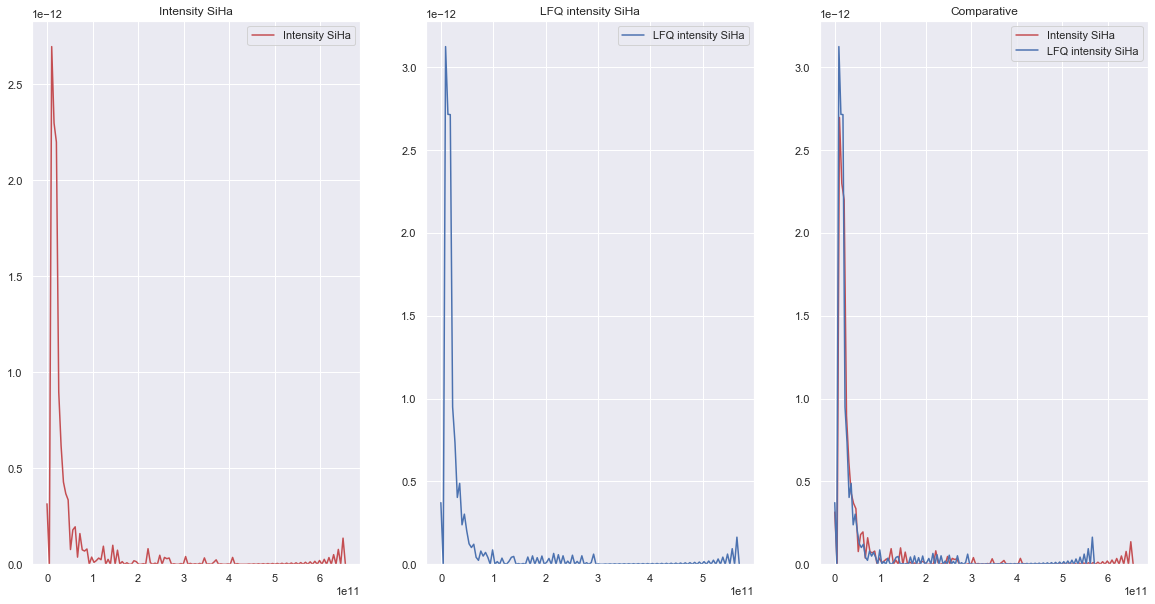

In [114]:
def main():

    datos = pd.read_csv('\\user\\carpeta\\MaxQuantTXToutputFileGelSol3CellsLFQ\\proteinGroups.csv', sep=',', skiprows=0, header=None).values
    
    
    CaLo = datos[1:,46:47]
    Intensity_CaLo = datos[1:,39:40]
    
    HaCaT = datos[1:,47:48]
    Intensity_HaCaT = datos[1:,40:41]
    
    SiHa = datos[1:,48:49]
    Intensity_SiHa = datos[1:,41:42]
    
    intensity_calo = pd.DataFrame(Intensity_CaLo, columns=['Intensity CaLo'])
    lfq_calo = pd.DataFrame(CaLo, columns=['LFQ intensity CaLo'])
    
    intensity_hacat = pd.DataFrame(Intensity_HaCaT, columns=['Intensity HaCaT'])
    lfq_hacat = pd.DataFrame(HaCaT, columns=['LFQ intensity Hacat'])
    
    intensity_siha = pd.DataFrame(Intensity_SiHa, columns=['Intensity SiHa'])
    lfq_siha = pd.DataFrame(SiHa, columns=['LFQ intensity SiHa'])
    
    print('\n')

    fig, (ax1, ax2, ax12) = plt.subplots(ncols=3, figsize=(20, 10))

    ax1.set_title('Intensity CaLo')
    sns.kdeplot(intensity_calo['Intensity CaLo'], ax=ax1,color="r")
    
    ax2.set_title('LFQ intensity CaLo')
    sns.kdeplot(lfq_calo['LFQ intensity CaLo'], ax=ax2,color="b")    

    ax12.set_title('Comparative')
    sns.kdeplot(intensity_calo['Intensity CaLo'], ax=ax12,color="r")
    sns.kdeplot(lfq_calo['LFQ intensity CaLo'], ax=ax12,color="b")        
    
    #############################
    
    fig2, (ax3, ax4, ax34) = plt.subplots(ncols=3, figsize=(20, 10))
    
    ax3.set_title('Intensity HaCaT')
    sns.kdeplot(intensity_hacat['Intensity HaCaT'], ax=ax3,color="r")
    
    ax4.set_title('LFQ intensity Hacat')
    sns.kdeplot(lfq_hacat['LFQ intensity Hacat'], ax=ax4,color="b")
    
    ax34.set_title('Comparative')
    sns.kdeplot(intensity_hacat['Intensity HaCaT'], ax=ax34,color="r")
    sns.kdeplot(lfq_hacat['LFQ intensity Hacat'], ax=ax34,color="b")
    #############################
    
    fig3, (ax5, ax6, ax56) = plt.subplots(ncols=3, figsize=(20, 10))
    ax5.set_title('Intensity SiHa')
    sns.kdeplot(intensity_siha['Intensity SiHa'], ax=ax5,color="r")    
    
    ax6.set_title('LFQ intensity SiHa')
    sns.kdeplot(lfq_siha['LFQ intensity SiHa'], ax=ax6,color="b")      
    
    ax56.set_title('Comparative')
    sns.kdeplot(intensity_siha['Intensity SiHa'], ax=ax56,color="r") 
    sns.kdeplot(lfq_siha['LFQ intensity SiHa'], ax=ax56,color="b") 
    
    plt.show()
    
if __name__ == "__main__":
    main()